In [139]:
# Import Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import plotly.express as px
import geopandas as gpd

In [112]:
plt.style.use('seaborn-v0_8-white')

In [113]:
# Load Zillow Research Data from CSV files 
mean_sales_price_data = pd.read_csv('Metro_mean_sale_price_uc_sfrcondo_sm_sa_month.csv')
total_transaction_price_data = pd.read_csv('Metro_total_transaction_value_uc_sfrcondo_sm_sa_month.csv')                                                         

In [ ]:
# Data Cleaning and Preprocessing

# Melt the dataframe to transform date columns into rows for easier time-series analysis
id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
mean_sales_price_melted_data = pd.melt(mean_sales_price_data, id_vars=id_vars, var_name='Date', value_name='Value')
total_transaction_price_melted_data = pd.melt(total_transaction_price_data, id_vars=id_vars, var_name='Date', value_name='Value')

# Convert 'Date' column from string to datetime format for easy date filtering and manipulation
mean_sales_price_melted_data['Date'] = pd.to_datetime(mean_sales_price_melted_data['Date'])
total_transaction_price_melted_data['Date'] = pd.to_datetime(total_transaction_price_melted_data['Date'])

# Remove any rows containing missing data to ensure clean analysis.
mean_sales_price_melted_data.dropna(inplace=True)
total_transaction_price_melted_data.dropna(inplace=True)

What insights of the sales of houses in the United States can be made?

sales price: the price at which homes acrss various geographies are sold
total transaction price: the total dollar value of all homes sold in a given peruid 

In [115]:
# Exploratory Data Analysis (EDA)

# Find the overall average sales price across the US
average_sales_price_US = mean_sales_price_melted_data['Value'].mean()
print(f"The average home in the US sold for approximately ${average_sales_price_US:,.2f}")

# Find the average sales price for each state
average_sales_price_by_state = mean_sales_price_melted_data.groupby('StateName')['Value'].mean()

# Convert the series into a DataFrame for better visualization
average_sales_price_by_state_df = average_sales_price_by_state.reset_index()

# Rename the columns 
average_sales_price_by_state_df.columns = ['State', 'Average Sales Price']

# Set global float format to avoid scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

# Sort the DataFrame by the 'Average Sales Price' column in descending order (greatest to least)
average_sales_price_by_state_df = average_sales_price_by_state_df.sort_values(by='Average Sales Price', ascending=False)

# Display the DataFrame
print(average_sales_price_by_state_df.to_string(index=False))

# Find the overall average total transaction price across the US
average_transaction_price_US = total_transaction_price_melted_data['Value'].mean()
print(f"The average total transaction price in the US is approximately ${average_transaction_price_US:,.2f}")

# Find the average total transaction price for each state
average_transaction_price_by_state = total_transaction_price_melted_data.groupby('StateName')['Value'].mean()

# Convert the series into a DataFrame
average_transaction_price_by_state_df = average_transaction_price_by_state.reset_index()

# Rename the columns
average_transaction_price_by_state_df.columns = ['State', 'Average Transaction Price']

# Sort the DataFrame by the 'Average Sales Price' column in descending order (greatest to least)
average_transaction_price_by_state_df = average_transaction_price_by_state_df.sort_values(by='Average Transaction Price', ascending=False)

# Print the DataFrame 
print(average_transaction_price_by_state_df.to_string(index=False))

The average home in the US sold for approximately $299,478.22
State  Average Sales Price
   HI           898,869.20
   CO           661,823.60
   CA           644,125.51
   UT           524,454.80
   MA           484,668.30
   MT           477,465.49
   NV           446,594.78
   WY           445,046.22
   WA           438,109.12
   RI           419,180.38
   ID           413,066.71
   CT           412,203.54
   OR           402,586.15
   NJ           380,540.46
   NH           373,575.95
   AZ           372,849.50
   FL           372,224.81
   VT           338,432.83
   MD           334,860.92
   DE           329,384.68
   SD           313,446.02
   NM           311,244.63
   ME           299,501.88
   VA           294,465.74
   SC           288,690.86
   TX           283,642.34
   ND           282,240.86
   NC           274,261.38
   MN           261,580.53
   TN           245,975.06
   NY           243,797.65
   GA           241,823.89
   WI           235,542.07
   MS           234,

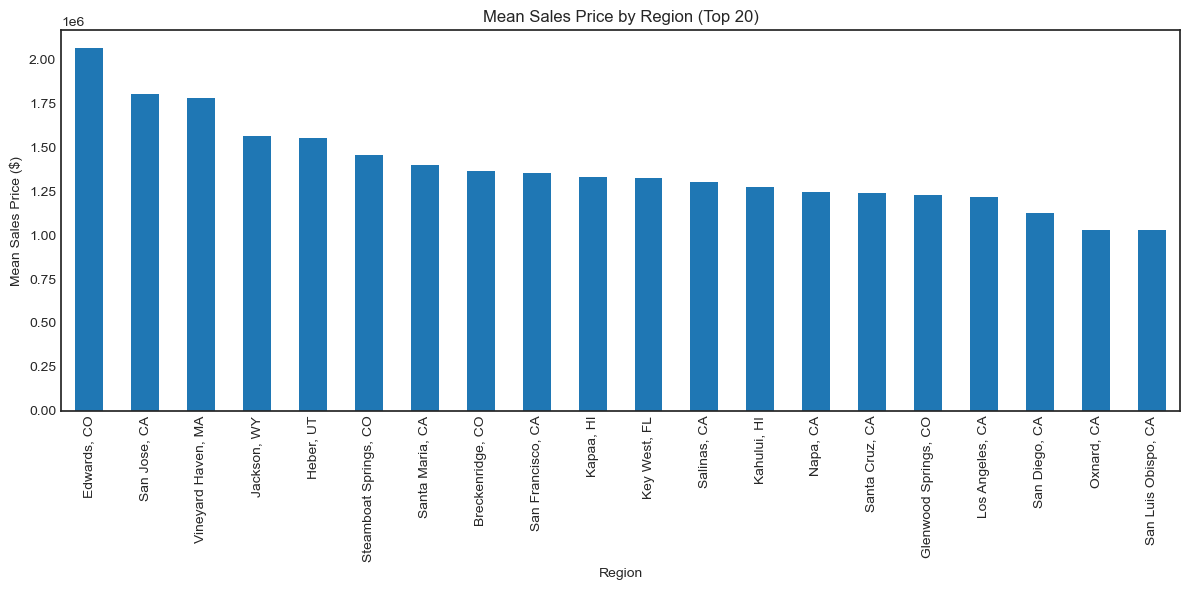

In [116]:
## Average Sales Price by Region (Top 20) 

# Find the most recent date in the data to focus on current home values
latest_date = mean_sales_price_melted_data['Date'].max() 

# Filter the data for the latest date to get the most recent values
latest_values = mean_sales_price_melted_data[mean_sales_price_melted_data['Date'] == latest_date] 

# Calculate the mean sales price for each region, sort by value in descending order
ordered_sales_by_region = latest_values.groupby('RegionName')['Value'].mean().sort_values(ascending=False) 

# Plot the top 20 regions with the highest median listing price.
plt.figure(figsize=(12, 6)) 
ordered_sales_by_region.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Mean Sales Price by Region (Top 20)') 
plt.xlabel('Region') 
plt.ylabel('Mean Sales Price ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Display the plot
plt.show()

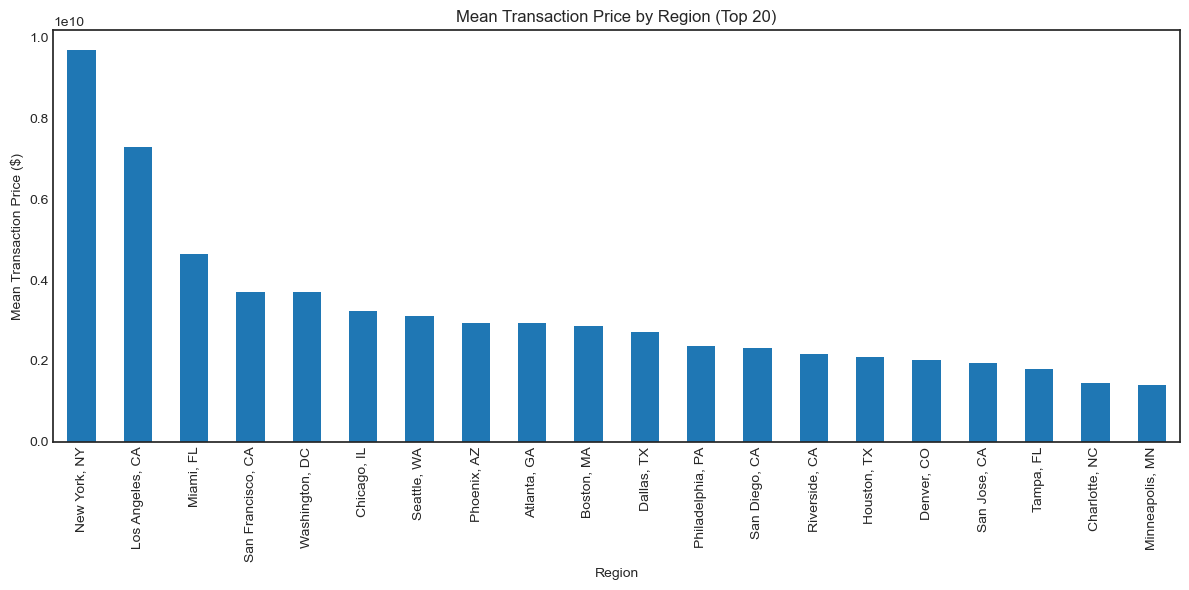

In [117]:
## 4.2 Mean Transaction Price by Region (Top 20) 

cleaned_transaction_sales =  total_transaction_price_melted_data[ total_transaction_price_melted_data['RegionName'] != 'United States']

# Find the most recent date in the data to focus on current home values
latest_date = cleaned_transaction_sales['Date'].max() 

# Filter the data for the latest date to get the most recent values
latest_values = cleaned_transaction_sales[cleaned_transaction_sales['Date'] == latest_date] 

# Calculate the mean transaction price for each region, sort by value in descending order
ordered_transaction_by_region = latest_values.groupby('RegionName')['Value'].mean().sort_values(ascending=False) 

# Plot the top 20 regions with the highest median listing price.
plt.figure(figsize=(12, 6)) 
ordered_transaction_by_region.head(20).plot(kind='bar') 

# Augment or and incorporate the other graph properties
plt.title('Mean Transaction Price by Region (Top 20)') 
plt.xlabel('Region') 
plt.ylabel('Mean Transaction Price ($)') 
plt.xticks(rotation=90) 
plt.tight_layout()

# Display the plot
plt.show()

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)
            featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0   Admin-1 scale rank          2  USA-3514     3514      US-MN   
1   Admin-1 scale rank          2  USA-3515     3515      US-MT   
2   Admin-1 scale rank          2  USA-3516     3516      US-ND   
3   Admin-1 scale rank          2  USA-3517     3517      US-HI   
4   Admin-1 scale rank          2  USA-3518     3518      US-ID   
5   Admin-1 scale rank          2  USA-3519     3519      US-WA   
6   Admin-1 scale rank          2  USA-3520     3520      US-AZ   
7   Admin-1 scale rank          2  USA-3521     3521      US-CA   
8   Admin-1 scale rank          2  USA-3522     3522      US-CO   
9   Adm

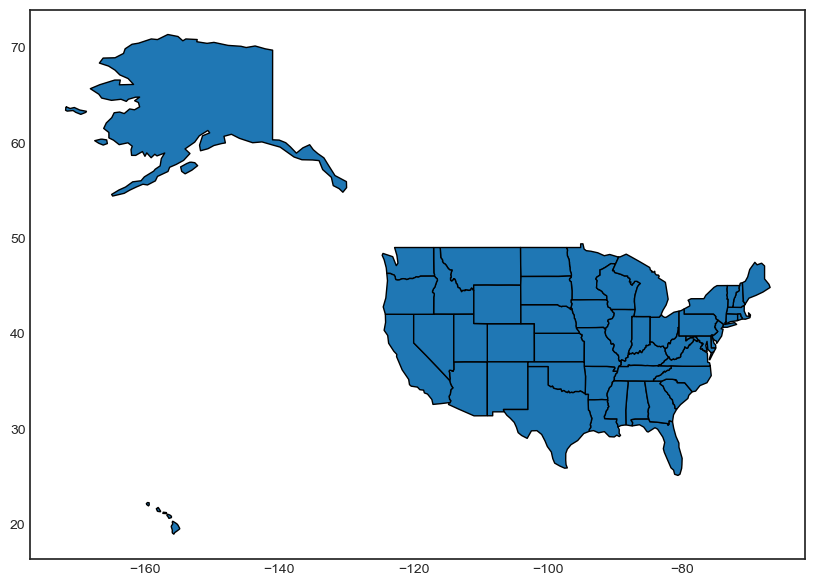

In [271]:
regions_by_transaction_price = total_transaction_price_melted_data.sort_values(by='Value', ascending=False)

regions_cleaned = regions_by_transaction_price.dropna(subset=['StateName'])

#Path to the shapefile you downloaded (replace with your local path)
shapefile_path = r"C:\Users\user\Downloads\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp"

# Load the shapefile into a GeoDataFrame
states_provinces = gpd.read_file(shapefile_path)

states_cleaned = states_provinces.dropna(subset=['iso_3166_2'])

# Filter the world dataset to only include the USA (North America)
#Check if the 'SOVEREIGNT' column contains 'United States of America'
#us_states = states_provinces[states_provinces['SOVEREIGNT'] == 'United States of America']

# Check the available columns and ensure there's a 'name' column for region names (like states)
print(states_provinces.columns) # Look for a column like 'name' (or 'RegionName') for region names

print(states_provinces.head(20))

states_provinces.plot(figsize=(10, 10), edgecolor='black')

# Normalize the 'StateName' column in your transaction dataset (top_20_regions)
regions_cleaned['normalized_name'] = regions_cleaned['StateName'].str.strip().str.upper()


# Normalize the state names in the shapefile dataset (assuming the column is 'iso_3166_2')
states_provinces['normalized_name'] = states_provinces['iso_3166_2'].str.split('-').str[1].str.strip().str.upper()
states_provinces['normalized_name'] = states_provinces['normalized_name'].str.strip().str.upper()

# Check unique values after normalization
print(states_provinces['normalized_name'].unique())

# Clean 'normalized_name' to extract state abbreviation from 'US-XX' format
states_provinces['StateAbbr'] = states_provinces['normalized_name'].str.split('-').str[1]

# Ensure 'StateAbbr' is a string in states_provinces
states_provinces['StateAbbr'] = states_provinces['StateAbbr'].astype(str)

# Convert 'StateName' column to string, handling NaN as 'missing' string if necessary
regions_cleaned['StateName'] = regions_cleaned['StateName'].astype(str)

# Strip leading/trailing spaces from both columns
regions_cleaned['StateName'] = regions_cleaned['StateName'].str.strip()
states_provinces['StateAbbr'] = states_provinces['StateAbbr'].str.strip()

# Convert both columns to uppercase
regions_cleaned['StateName'] = regions_cleaned['StateName'].str.upper()
states_provinces['StateAbbr'] = states_provinces['StateAbbr'].str.upper()

# Merge the datasets using the cleaned state abbreviation columns
merged_data = pd.merge(regions_cleaned, states_provinces, left_on='StateName', right_on='StateAbbr', how='inner')

# Check the merged result
print(merged_data.head())

# Group by 'StateName' and sum the 'TransactionPrice'
total_transaction_price_per_state = merged_data.groupby('StateName')['Value'].sum().reset_index()

# Rename the column for clarity
total_transaction_price_per_state.rename(columns={'Value': 'Total Transaction Price'}, inplace=True)

print(total_transaction_price_per_state)
                                        

#grouped_data = total_transaction_price_per_state.groupby('StateName').agg({
    #'Value': 'sum',  # Sum the 'Value' column for each state
    #'RegionName': 'first'  # Get the first 'RegionName' for each state (you can change this)
#}).reset_index()

#merged = states_provinces.set_index('STATENAME').join(top_20_regions_by_transaction_price)
# Create an interactive map (ensure 'RegionName' matches the field in your data)
#fig = px.choropleth(grouped_data,
                    #locations='RegionName',  # Column for regions
                    #color='Value',  # Column to color by
                    #hover_name='RegionName',  # Column to show when hovering
                    #color_continuous_scale='Viridis',  # Choose color scale
                    #labels={'Value': 'Average Transaction Price'},
                    #title="Top 20 Regions by Average Transaction Price")

# Show the interactive plot
#fig.show()

# Check unique values in both datasets' normalized columns
#print(states_provinces['normalized_name'].unique())  # From the shapefile
#print(regions_cleaned['normalized_name'].unique())   # From your region dataset

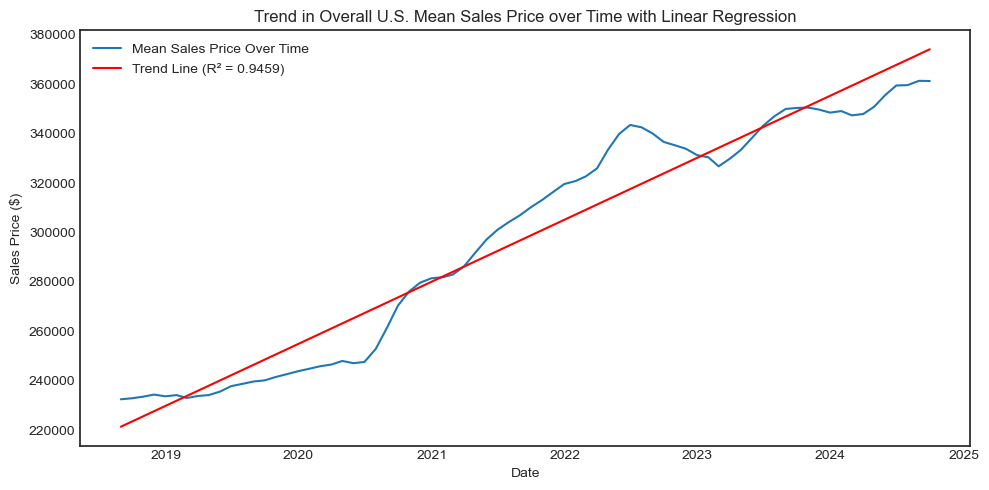

R-squared value for Overall U.S.: 0.9459


In [122]:
## Trend Line (Linear Regression) with R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    sales_price_over_time = data.groupby('Date')['Value'].mean().reset_index()
    X =  sales_price_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y =  sales_price_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(sales_price_over_time['Date'], y, label='Mean Sales Price Over Time')
    plt.plot(sales_price_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Mean Sales Price over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Sales Price ($)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Overall U.S.
calculate_trend_with_r2(mean_sales_price_melted_data, 'Overall U.S.')

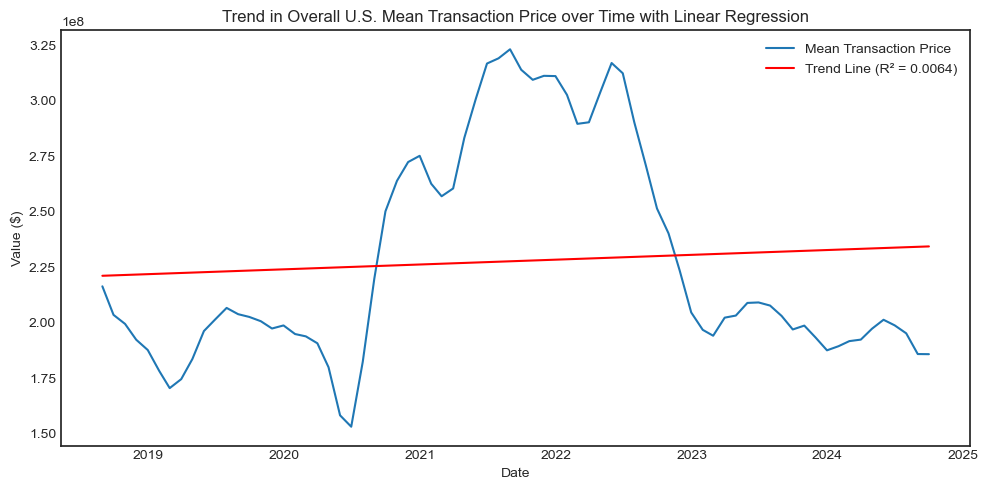

R-squared value for Overall U.S.: 0.0064


In [124]:
## Trend Line (Linear Regression) with R-squared Value

# Function to calculate and plot trend with linear regression
def calculate_trend_with_r2(data, region_name):
    total_transaction_price_over_time = data.groupby('Date')['Value'].mean().reset_index()
    X = total_transaction_price_over_time['Date'].map(datetime.toordinal).values.reshape(-1, 1)
    y = total_transaction_price_over_time['Value'].values

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(total_transaction_price_over_time['Date'], y, label='Mean Transaction Price')
    plt.plot(total_transaction_price_over_time['Date'], y_pred, color='red', label=f'Trend Line (R² = {r_squared:.4f})')
    plt.title(f"Trend in {region_name} Mean Transaction Price over Time with Linear Regression")
    plt.xlabel("Date")
    plt.ylabel("Value ($)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"R-squared value for {region_name}: {r_squared:.4f}")

# Overall U.S.
calculate_trend_with_r2(total_transaction_price_melted_data, 'Overall U.S.')

Note: you may need to restart the kernel to use updated packages.
